In [ ]:
import resnet50
import lasagne
import theano
import theano.tensor as T
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os, sys
import skimage.transform
import skimage.io
import pickle

In [ ]:
# Download pretrained weights from:
# https://s3.amazonaws.com/lasagne/recipes/pretrained/imagenet/resnet50.pkl
model = pickle.load(open('resnet50.pkl', 'rb'))
classes = model['synset_words']
mean_image = model['mean_image']

In [ ]:
#computational graph construction
net = resnet50.build_model()

#load weights
lasagne.layers.set_all_param_values(net['prob'], model['values'])

#define placeholder variables
input_var = T.tensor4('input_var')
output_var = lasagne.layers.get_output(net['prob'], {net['input']: input_var}, deterministic=True)

#compile prediction function
predict_fn = theano.function([input_var], output_var)

In [ ]:
def central_crop(img):
    width, height, _ = img.shape
    d = min(width, height)
    left = (width - d)/2
    top = (height - d)/2
    right = (width + d)/2
    bottom = (height + d)/2
    return img[top:bottom, left:right]

def preprocess(img):
    #implement me

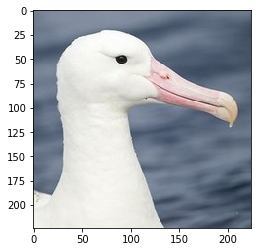

0.999970 albatross
0.000025 goose
0.000001 white stork
0.000001 American coot
0.000001 oystercatcher


In [17]:
img = skimage.io.imread('sample_images/albatross.jpg')
plt.imshow(img)
plt.show()

prob = predict_fn(preprocess(img)).ravel()

for i in np.argsort(prob)[-5:][::-1]:
    print('%f %s' % (prob[i], classes[i].split(',')[0]))

# Cats vs dogs classifier

In [ ]:
def is_cat_or_dog(img):
    #imlement me
    if True
        return 'dog'
    else:
        return 'cat'

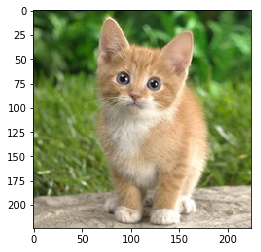

This is a cat


In [20]:
img = skimage.io.imread('sample_images/kitten.jpg')
plt.imshow(img)
plt.show()

print 'This is a', is_cat_or_dog(img)

# One-shot learning

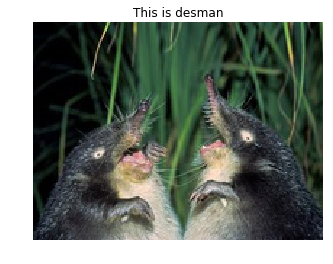

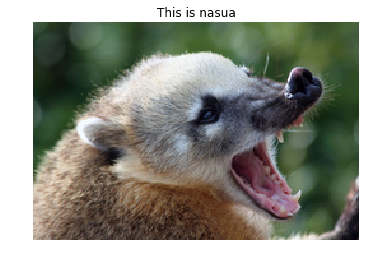

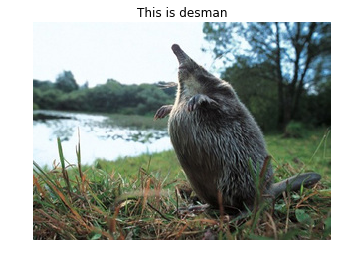

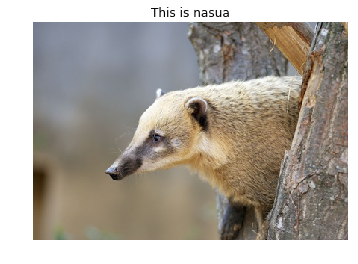

In [10]:
features_fn = #implement me

nasua = skimage.io.imread('sample_images/nasua.jpg')
nasua_features = features_fn(preprocess(nasua))
desman = skimage.io.imread('sample_images/desman.jpg')
desman_features = features_fn(preprocess(desman))

def is_nasua_or_desman(img):
    features = features_fn(preprocess(img))
    if np.linalg.norm(features - nasua_features) < np.linalg.norm(features - desman_features):
        return 'nasua'
    else:
        return 'desman'
    
for f in os.listdir('one_shot')[:4]:
    img = skimage.io.imread(os.path.join('one_shot', f))
    plt.imshow(img)
    plt.title('This is ' + is_nasua_or_desman(img))
    plt.axis('off')
    plt.show()